<a href="https://colab.research.google.com/github/livio-24/LoanEligibilityPrediction/blob/main/LoanEligibilityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRERIE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# COLLEZIONE DATI

In [2]:
url = "https://raw.githubusercontent.com/livio-24/LoanEligibilityPrediction/main/dataset.csv"

#caricamento dataset in un pandas dataframe
dataset = pd.read_csv(url)

# EXPLORATORY DATA ANALYSIS

In [3]:
#prime 5 righe
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#numero righe e colonne
dataset.shape

(614, 13)

In [5]:
dataset.describe()
#misure statistiche

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#info sulle colonne
#5 variabili numeriche e 8 variabili categoriche
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Distribuzione variabile target
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# numero di valori mancanti in ogni colonna
# verranno gestiti successivamente nella fase di data cleaning
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#eliminiamo colonna Loan_ID perché inutile
dataset.drop(columns='Loan_ID', axis = 1, inplace=True)

In [10]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**DATA VISUALIZATION - ANALISI UNIVARIATA**

VARIABILI CATEGORICHE

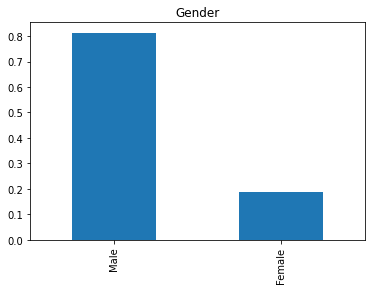

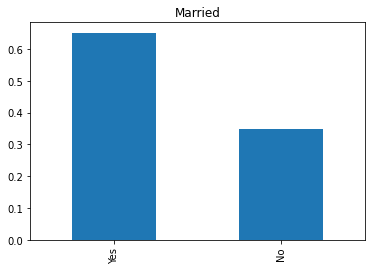

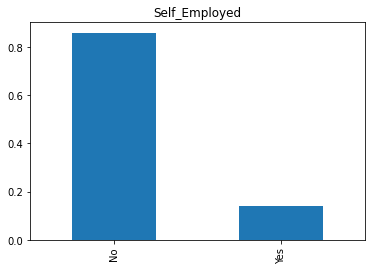

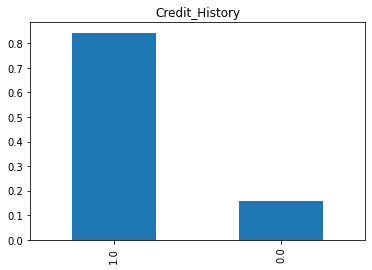

In [11]:
#visualizzazione valori variabili catagoriche in percentuale
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Risultati:
- 80% dei candidati nel dataset è maschio
- Circa il 65% dei candidati nel dataset è sposato/a
- Circa il 15% lavora in proprio
- Circa l'85% ha ripagato i propri debiti

VARIABILI ORDINALI

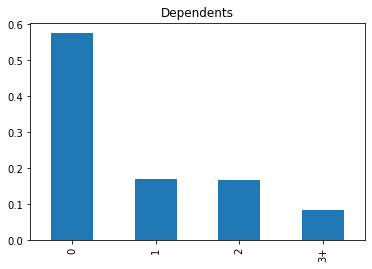

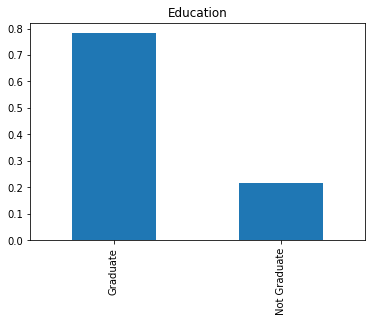

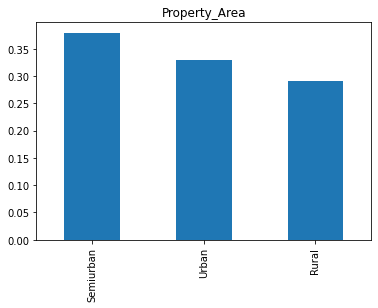

In [12]:
#visualizzazione valori variabili ordinali in percentuale
dataset['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Risultati:
- La maggior parte dei candidati non ha familiari dipendenti
- Circa l'80% dei candidati ha una laurea
- La maggior parte dei candidati vive in un'area semiurbana

VARIABILI NUMERICHE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


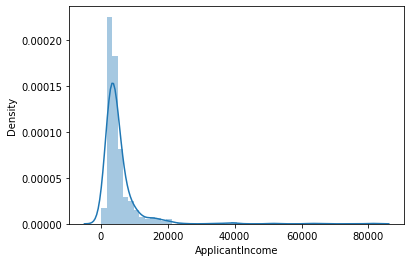

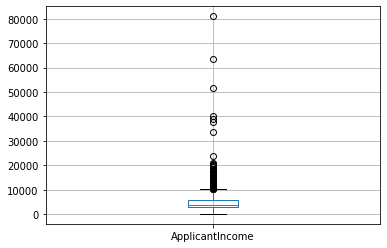

In [13]:
#visualizzazione distribuzione variabile 'ApplicantIncome'
sns.distplot(dataset['ApplicantIncome'])
plt.show()
#boxplot per individuazione outliers
dataset.boxplot(['ApplicantIncome'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


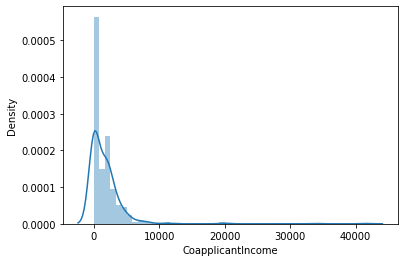

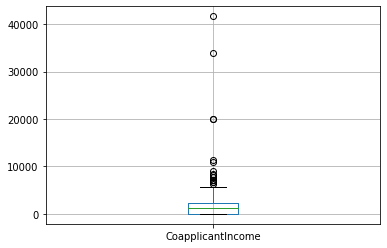

In [14]:
#visualizzazione distribuzione variabile 'CoapplicantIncome'
sns.distplot(dataset['CoapplicantIncome'])
plt.show()
#boxplot per individuazione outliers
dataset.boxplot(['CoapplicantIncome'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


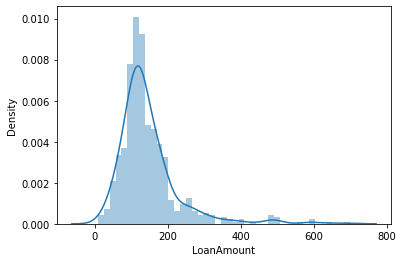

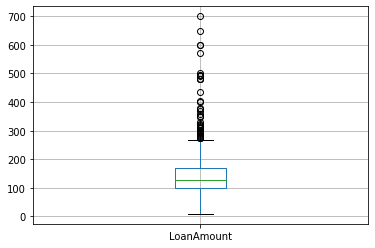

In [15]:
#visualizzazione distribuzione variabile 'LoanAmount'
sns.distplot(dataset['LoanAmount'])
plt.show()
dataset.boxplot(['LoanAmount'])
plt.show()

In [16]:
#dataset['LoanAmount'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


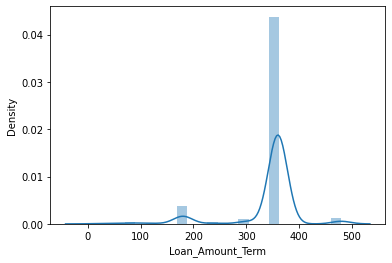

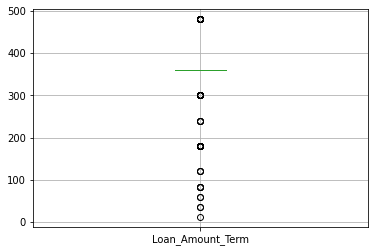

In [17]:
#visualizzazione distribuzione variabile 'Loan_Amount_Term'
sns.distplot(dataset['Loan_Amount_Term'])
plt.show()
dataset.boxplot(['Loan_Amount_Term'])
plt.show()

La maggior parte delle features numeriche ha degli outliers

**Matrice di correlazione**

In [18]:
correlation_matrix = dataset.corr()

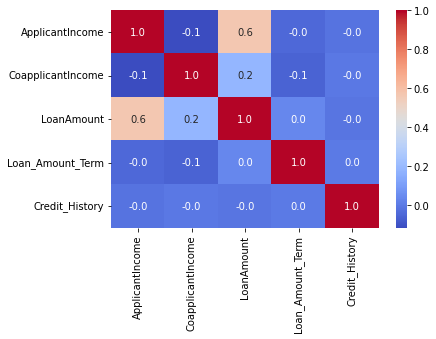

In [19]:
# heat map per visualizzare matrice di correlazione
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='coolwarm')
#plt.savefig('Correlation Heat map', bbox_inches='tight')

Non ci sono molte variabili correlate tra di loro, le uniche due sono ApplicantIncome - LoanAmount

In [20]:
#conversione variabili categoriche in numeriche
dataset.replace({'Gender':{'Male':0, 'Female':1}, 'Married' :{'No':0, 'Yes':1}, 'Education':{'Not Graduate':0, 'Graduate':1}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Urban':1, 'Semiurban':2}, 'Loan_Status':{'N':0, 'Y':1}}, inplace = True)


# replacing the value of 3+ to 4
dataset['Dependents'].replace(to_replace='3+', value=4, inplace=True)

# DATA CLEANING

**CONTROLLO VALORI MANCANTI**

In [21]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#Sostituiamo i valori mancanti con la moda per le variabili categoriche
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

#Utilizziamo la mediana poiché la variabile ha degli outliers, quindi non è un buon approccio utilizzare la media
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
#dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

In [23]:
dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
#Nella variabile Loan_Amount_Term possiamo notare che 360 è il valore che si ripete di più, quindi utilizziamo la moda
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)


In [25]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
#Per trasformare Dtype di Dependents in int
dataset['Dependents'] = dataset['Dependents'].astype(str).astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 57.7 KB


**GESTIONE OUTLIERS**

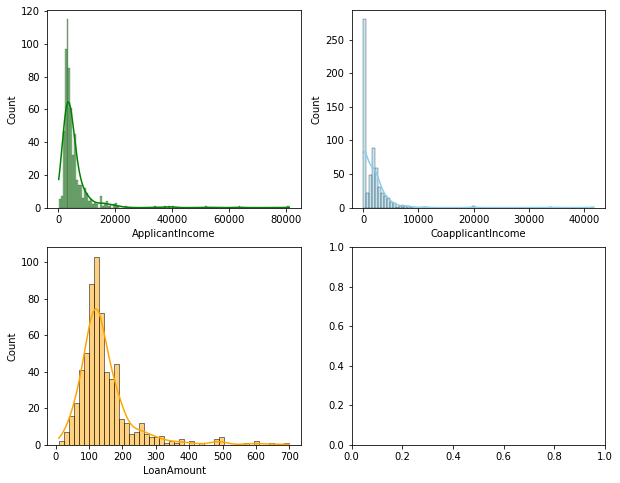

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Distribuzioni prima di applicare log
sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

In [28]:
# Log Transformation per normalizzare la distribuzione

dataset.ApplicantIncome = np.log(dataset.ApplicantIncome)
dataset.CoapplicantIncome = np.log(dataset.CoapplicantIncome + 1)
dataset.LoanAmount = np.log(dataset.LoanAmount)

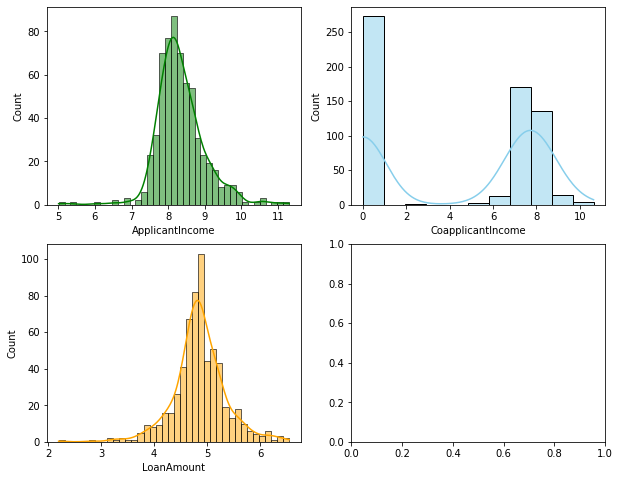

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Distribuzioni dopo aver applicato log
sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

Possiamo notare che la distribuzione è migliorata dopo aver applicato il logaritmo

# SPLIT DATASET

In [30]:
#definizione variabili dipendenti e indipendenti

x = dataset.drop('Loan_Status', axis = 1)
y = dataset['Loan_Status']

In [31]:
#split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (491, 11)
y_train dataset:  (491,)
X_test dataset:  (123, 11)
y_test dataset:  (123,)


In [32]:
y_test.value_counts()

1    85
0    38
Name: Loan_Status, dtype: int64

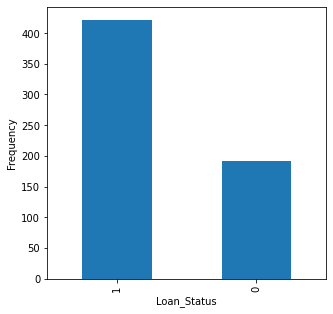

In [33]:
#Distribuzione della variabile dipendente
plt.figure(figsize=(5,5))
pd.value_counts(dataset['Loan_Status']).plot.bar()
plt.xlabel('Loan_Status')
plt.ylabel('Frequency')
dataset['Loan_Status'].value_counts()
plt.savefig('target_distr', bbox_inches='tight')

# DATA SCALING

In [34]:
#Normalizzazione
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#z-score
#scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

df = pd.DataFrame(X_train, columns = x.columns)

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.00,1.0,0.0,0.460200,0.000000,0.393857,0.743590,1.0,0.5
1,0.0,1.0,0.25,1.0,0.0,0.463318,0.000000,0.543684,0.743590,1.0,1.0
2,0.0,1.0,0.50,1.0,0.0,0.464580,0.699868,0.646188,0.743590,0.0,0.0
3,0.0,1.0,0.25,0.0,0.0,0.425911,0.687558,0.581132,0.358974,0.0,0.0
4,0.0,1.0,0.00,1.0,0.0,0.423809,0.724519,0.646188,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
486,0.0,0.0,0.00,1.0,0.0,0.444921,0.745901,0.636812,0.743590,1.0,1.0
487,0.0,1.0,0.00,1.0,0.0,0.424129,0.821669,0.696827,0.743590,1.0,0.0
488,0.0,1.0,0.00,1.0,0.0,0.434906,0.725779,0.598733,0.743590,1.0,1.0
489,1.0,1.0,0.00,1.0,0.0,0.414858,0.727800,0.625367,0.743590,1.0,1.0


# FEATURE SELECTION

In [35]:
#feature selection supervisionata

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from numpy import set_printoptions

fs = SelectKBest(score_func=chi2,k=5)
fs.fit_transform(X_train, y_train)

X_new_train = fs.transform(X_train)
X_new_test = fs.transform(X_test)
print(X_new_train.shape)

x.columns[fs.get_support(indices=True)]
print("features selezionate: ", x.columns[fs.get_support(indices=True)].tolist())

(491, 5)
features selezionate:  ['Married', 'Education', 'CoapplicantIncome', 'Credit_History', 'Property_Area']


# COSTRUZIONE MODELLI

In [36]:
models = []
precision = []
accuracy = []
recall = []
f1 = []

**LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


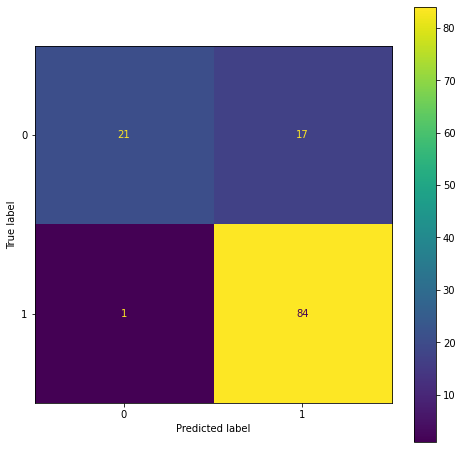

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

Accuracy on training data: 0.7983706720977597
Accuracy on test data: 0.8536585365853658


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score ,recall_score, precision_score, f1_score

logisticRegr = LogisticRegression()
logisticRegr.fit(X_new_train, y_train)

y_train_pred = logisticRegr.predict(X_new_train)
y_test_pred = logisticRegr.predict(X_new_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(logisticRegr, X_new_test, y_test, ax=ax)
plt.show()
#print(confusion_matrix(y_test, y_test_pred))

#Risultati ottenuti
print(classification_report(y_test, y_test_pred))
print("Accuracy on training data:",accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred))

models.append('Logistic Regression')
accuracy.append(accuracy_score(y_test, y_test_pred))
recall.append(recall_score(y_test, y_test_pred))
precision.append(precision_score(y_test, y_test_pred))
f1.append(f1_score(y_test, y_test_pred))

**DECISION TREE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


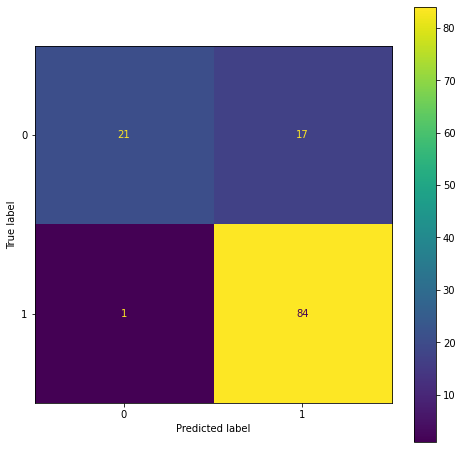

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        38
           1       0.84      0.88      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123

Accuracy on training data: 0.8859470468431772
Accuracy on test data: 0.8048780487804879


In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier( random_state=42)
tree_model.fit(X_new_train, y_train)

y_train_pred = tree_model.predict(X_new_train)
y_test_pred = tree_model.predict(X_new_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(logisticRegr, X_new_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_test_pred))
print("Accuracy on training data:",accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred))

models.append('Decision Tree')
accuracy.append(accuracy_score(y_test, y_test_pred))
recall.append(recall_score(y_test, y_test_pred))
precision.append(precision_score(y_test, y_test_pred))
f1.append(f1_score(y_test, y_test_pred))

**NAIVE BAYES**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


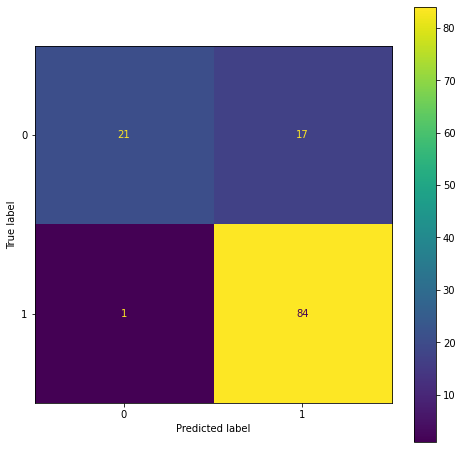

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

Accuracy on training data: 0.7983706720977597
Accuracy on test data: 0.8536585365853658


In [39]:
from sklearn.naive_bayes import  GaussianNB

NB = GaussianNB()
NB.fit(X_new_train, y_train)

y_train_pred = NB.predict(X_new_train)
y_test_pred = NB.predict(X_new_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(NB, X_new_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_test_pred))
print("Accuracy on training data:",accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred))

models.append('Naive Bayes')
accuracy.append(accuracy_score(y_test, y_test_pred))
recall.append(recall_score(y_test, y_test_pred))
precision.append(precision_score(y_test, y_test_pred))
f1.append(f1_score(y_test, y_test_pred))

**RANDOM FOREST**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


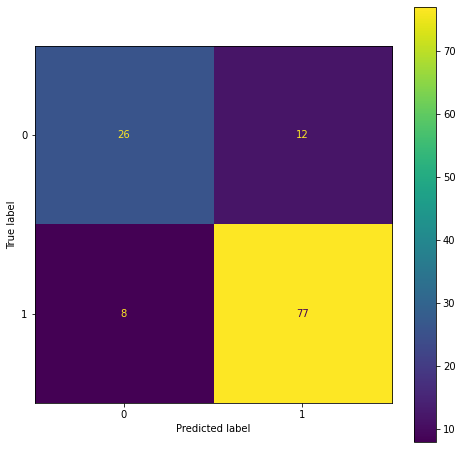

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.87      0.91      0.89        85

    accuracy                           0.84       123
   macro avg       0.81      0.80      0.80       123
weighted avg       0.83      0.84      0.83       123

Accuracy on training data: 0.8859470468431772
Accuracy on test data: 0.8373983739837398


In [40]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(X_new_train, y_train)

y_train_pred = RandomForest.predict(X_new_train)
y_test_pred = RandomForest.predict(X_new_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(RandomForest, X_new_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_test_pred))
print("Accuracy on training data:",accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred))

models.append('Random Forest')
accuracy.append(accuracy_score(y_test, y_test_pred))
recall.append(recall_score(y_test, y_test_pred))
precision.append(precision_score(y_test, y_test_pred))
f1.append(f1_score(y_test, y_test_pred))

**XGBOOST**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


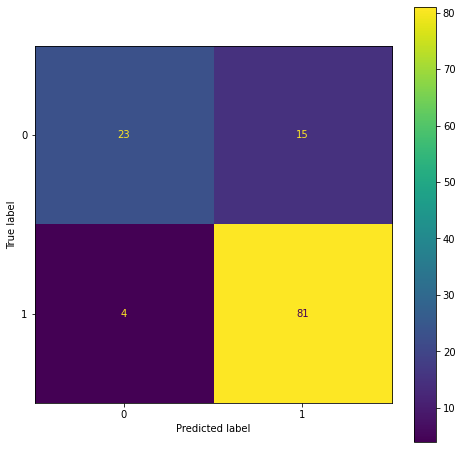

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.84       123

Accuracy on training data: 0.8207739307535642
Accuracy on test data: 0.8455284552845529


In [41]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_new_train, y_train)

y_train_pred = XGB.predict(X_new_train)
y_test_pred = XGB.predict(X_new_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(XGB, X_new_test, y_test, ax=ax)  
plt.show()

print(classification_report(y_test, y_test_pred))
print("Accuracy on training data:",accuracy_score(y_train, y_train_pred))
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred))

models.append('XGBoost')
accuracy.append(accuracy_score(y_test, y_test_pred))
recall.append(recall_score(y_test, y_test_pred))
precision.append(precision_score(y_test, y_test_pred))
f1.append(f1_score(y_test, y_test_pred))

**CONFRONTO METRICHE**

In [42]:
compare = pd.DataFrame({'Model': models, 
                        'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'f1_score': f1})
compare.sort_values(by='Accuracy', ascending=False)
#print(compare.to_latex())


,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression,0.853659,0.831683,0.988235,0.903226
2,Naive Bayes,0.853659,0.831683,0.988235,0.903226
4,XGBoost,0.845528,0.843750,0.952941,0.895028
3,Random Forest,0.837398,0.865169,0.905882,0.885057
1,Decision Tree,0.804878,0.842697,0.882353,0.862069
